# Imports 

In [1]:
import pandas as pd
import numpy as np 
import time 
import datetime 
import matplotlib.pyplot as plt 
%matplotlib inline  
import plotly.express as px
import plotly.graph_objects as go 
from sklearn.preprocessing import StandardScaler

# Reading Dataset 

In [2]:
orig_df = pd.read_csv('/Users/faymajidelhassan/Downloads/Master project /CODE/EDA/cleaned_measurements_data.csv') 
df = orig_df.copy() 
print(f'Size of the dataset: {df.shape} \n')  
print() 
display(df.head(5))

Size of the dataset: (54034, 8) 




,timestamp,temperature,humidity,pressure,global_irradiance,direct_irradiance,diffuse_irradiance,precipitation
0,2018-04-17 05:00:00,14.286111,78.305556,9959.194444,1114.0,0.0,1113.0,0.0
1,2018-04-17 06:00:00,14.478333,79.550000,9967.350000,3823.0,0.0,3843.0,0.1
2,2018-04-17 07:00:00,13.531667,82.016667,9975.416667,2795.0,0.0,2808.0,0.0
3,2018-04-17 08:00:00,14.596667,83.750000,9983.666667,7721.0,0.0,7732.0,1.2
4,2018-04-17 09:00:00,16.148333,81.516667,9988.616667,15321.0,120.0,15313.0,0.6


# Cleaning the data 

### Renaming he columns 

In [3]:
# df.columns = ['Date' , 'Temperature', 'Pressure' , 'Humidity']

### Removing possible outliers

In [4]:
df.describe()

,temperature,humidity,pressure,global_irradiance,direct_irradiance,diffuse_irradiance,precipitation
count,54034.000000,54034.000000,54034.000000,54034.000000,54034.000000,54034.000000,54034.00000
mean,12.063996,71.143214,7079.025720,7779.696213,6828.404828,3604.635081,0.07672
std,8.879005,16.368814,1440.925184,13247.137609,14009.334951,5452.747625,0.58627
min,-6.028333,10.433333,6088.260243,0.000000,0.000000,0.000000,0.00000
25%,4.600000,58.016667,6091.000000,0.000000,0.000000,0.000000,0.00000
50%,9.900000,74.383333,6464.808333,1794.000000,0.000000,1815.000000,0.00000
75%,19.070000,86.000000,6748.000000,8574.250000,1615.750000,4579.750000,0.00000
max,39.525000,97.883333,10648.966667,61403.000000,55775.000000,43867.000000,54.60000


In [5]:
# Compute quantiles for numeric columns only
display(df.select_dtypes(include='number').quantile([0, 0.25, 0.5, 0.75, 1], axis=0))


,temperature,humidity,pressure,global_irradiance,direct_irradiance,diffuse_irradiance,precipitation
0.00,-6.028333,10.433333,6088.260243,0.00,0.00,0.00,0.0
0.25,4.600000,58.016667,6091.000000,0.00,0.00,0.00,0.0
0.50,9.900000,74.383333,6464.808333,1794.00,0.00,1815.00,0.0
0.75,19.070000,86.000000,6748.000000,8574.25,1615.75,4579.75,0.0
1.00,39.525000,97.883333,10648.966667,61403.00,55775.00,43867.00,54.6


In [6]:
df.shape

(54034, 8)

In [7]:
# df = df[(df['humidity'] >= 39) & (df['humidity'] <= 78)]
# df = df[(df['pressure'] >= 1002.0) & (df['pressure'] <= 1014.0)]
# df = df[(df['temperature'] >= 19.0) & (df['temperature'] <= 32.0)]

In [8]:
df.shape

(54034, 8)

In [9]:
max_temp = np.max(df['temperature'])
max_pres = np.max(df['pressure'])
max_humid = np.max(df['humidity'])

min_temp = np.min(df['temperature'])
min_pres = np.min(df['pressure'])
min_humid = np.min(df['humidity'])

print(f'Max Temp : {max_temp}')
print(f'Max Pressure : {max_pres}')
print(f'Max Humidity : {max_humid}')

print(f'Min Temp : {min_temp}')
print(f'Min Pressure : {min_pres}')
print(f'Min Humidity : {min_humid}')

Max Temp : 39.525
Max Pressure : 10648.966666666667
Max Humidity : 97.88333333333334
Min Temp : -6.028333333333333
Min Pressure : 6088.260243101767
Min Humidity : 10.433333333333334


### Removing Missing values 

In [10]:
df.isnull().sum()

timestamp             0
temperature           0
humidity              0
pressure              0
global_irradiance     0
direct_irradiance     0
diffuse_irradiance    0
precipitation         0
dtype: int64

In [11]:
print('Dataframe shape : {}'.format(df.shape))

Dataframe shape : (54034, 8)


### Resetting index 

In [12]:
idx = pd.date_range('2018-04-17 05:00:00', periods=54034 , freq='1h')

In [13]:
df = df.set_index(idx)
df.index.name = 'timestamp' 
date_column = df['timestamp'] 
df = df.drop(columns = ['timestamp','global_irradiance','direct_irradiance','diffuse_irradiance','precipitation'] , axis = 1)

In [14]:
df.head()

,temperature,humidity,pressure
timestamp,,,
2018-04-17 05:00:00,14.286111,78.305556,9959.194444
2018-04-17 06:00:00,14.478333,79.550000,9967.350000
2018-04-17 07:00:00,13.531667,82.016667,9975.416667
2018-04-17 08:00:00,14.596667,83.750000,9983.666667
2018-04-17 09:00:00,16.148333,81.516667,9988.616667


In [15]:
df_array = np.array(df) 
df_array

array([[1.42861111e+01, 7.83055556e+01, 9.95919444e+03],
       [1.44783333e+01, 7.95500000e+01, 9.96735000e+03],
       [1.35316667e+01, 8.20166667e+01, 9.97541667e+03],
       ...,
       [4.60000000e+00, 8.60000000e+01, 6.09100000e+03],
       [4.60000000e+00, 8.60000000e+01, 6.09100000e+03],
       [4.60000000e+00, 8.60000000e+01, 6.09100000e+03]])

### Reducing size for faster computation

In [16]:
df_array = df_array[:4000]
df_array.shape 

(4000, 3)

### Scaling features 

In [17]:
scaler = StandardScaler() 
scaled_df_array = scaler.fit_transform(df_array)

In [18]:
scaled_df_array[:10]

array([[-1.32792459,  1.11750583,  0.99847914],
       [-1.29186705,  1.21054772,  1.14219326],
       [-1.46944523,  1.39497004,  1.28434101],
       [-1.26966978,  1.52456411,  1.42971939],
       [-0.97860414,  1.35758714,  1.51694642],
       [-0.66659177,  0.78562872,  1.52282029],
       [-0.40960363,  0.2921744 ,  1.52840047],
       [-0.33769697, -0.07417805,  1.53486173],
       [-0.44868333, -0.01436541,  1.51019146],
       [-0.57342575,  0.33329559,  1.50167434]])

### Segregating feaures 

In [19]:
  sha = scaled_df_array[:, 0].reshape((-1, 1))
  spa = scaled_df_array[:, 1].reshape((-1, 1))
  sta = scaled_df_array[:, 2].reshape((-1, 1))

  sha.shape , spa.shape , sta.shape 

((4000, 1), (4000, 1), (4000, 1))

# Preparing training and test set

### Preparing training set

In [20]:
train_data_len = int(np.ceil(len(df_array)* 0.95))
train_data_len

3800

In [21]:
x_train = []
y_train_temp = [] 
y_train_humidity = [] 
y_train_pressure = [] 

for i in range(48 , train_data_len) : 
  temp1 = sha[i - 48 : i, 0] 
  temp2 = spa[i - 48 : i, 0] 
  temp3 = sta[i - 48 : i, 0] 
  temp4 = np.concatenate((temp1 , temp2 , temp3))

  x_train.append(temp4) 
  y_train_temp.append(sta[i, 0])
  y_train_humidity.append(sha[i, 0])
  y_train_pressure.append(spa[i, 0])

  if i <= 49 : 
    print(x_train , np.array(x_train).shape)
    print()
    print(y_train_temp , y_train_humidity, y_train_pressure)
    print()
   

[array([-1.32792459, -1.29186705, -1.46944523, -1.26966978, -0.97860414,
       -0.66659177, -0.40960363, -0.33769697, -0.44868333, -0.57342575,
       -0.65627473, -0.83197708, -0.99736239, -1.09771908, -1.12992075,
       -1.14961692, -1.10803612, -0.82978862, -0.73756051, -0.83948039,
       -0.9201409 , -1.04519595, -1.16618672, -1.27998682, -1.14680319,
       -0.96953764, -0.82791279, -0.53590924, -0.323003  , -0.23952875,
       -0.06445168,  0.06341712,  0.12250563,  0.06779405,  0.05591382,
       -0.10478193, -0.33582115, -0.61688239, -0.84166885, -0.96453544,
       -1.05738882, -1.10365919, -1.16774991, -1.4234875 , -1.67047123,
       -1.86430657, -2.02125067, -1.99717757,  1.11750583,  1.21054772,
        1.39497004,  1.52456411,  1.35758714,  0.78562872,  0.2921744 ,
       -0.07417805, -0.01436541,  0.33329559,  0.40183092,  1.00369566,
        1.3750325 ,  1.45353659,  1.35135666,  1.39372395,  0.87659379,
       -0.16140483, -0.69099596, -0.76950005, -0.64862867, -0.4

In [22]:
np.array(x_train).shape , np.array(y_train_humidity).shape, np.array(y_train_pressure).shape , np.array(y_train_temp).shape

((3752, 144), (3752,), (3752,), (3752,))

In [23]:
x_train = np.array(x_train).reshape((-1 , 144 , 1))
y_train_humidity = np.array(y_train_humidity)
y_train_pressure = np.array(y_train_pressure)
y_train_temp = np.array(y_train_temp)

### Preparing testing set

In [24]:
test_data = sta[train_data_len - 48 : , :]
test_data.shape

(248, 1)

In [25]:
x_test = []

y_test_temp = sta[train_data_len : , :] 
y_test_humidity = sha[train_data_len : , :]
y_test_pressure = spa[train_data_len : , :]

for i in range (48 , len(test_data)):
  temp1 = sha[train_data_len - 48 + i - 48 : train_data_len - 48 + i ]
  temp2 = spa[train_data_len - 48 + i - 48 : train_data_len - 48 + i ]
  temp3 = sta[train_data_len - 48 + i - 48 : train_data_len - 48 + i ]

  temp4 = np.concatenate((temp1 , temp2 , temp3))
  x_test.append(temp4)
  
  if  i<=49:
    print(x_test , np.array(x_test).shape)
    print()
    print(y_test_temp , y_test_humidity, y_test_pressure)
    print()
    

[array([[ 1.38087214],
       [ 1.14451808],
       [ 1.1895379 ],
       [ 0.92942338],
       [ 0.58583462],
       [ 0.34823001],
       [ 0.22129913],
       [ 0.11750343],
       [-0.0878995 ],
       [-0.28579912],
       [-0.44993389],
       [-0.53841034],
       [-0.67659617],
       [-0.73224567],
       [-0.79508584],
       [-0.93483487],
       [-0.79102155],
       [-0.38271679],
       [ 0.08467648],
       [ 0.45358889],
       [ 0.94661845],
       [ 1.2401852 ],
       [ 1.24956433],
       [ 1.3755573 ],
       [ 1.40807161],
       [ 1.43714691],
       [ 1.25300334],
       [ 1.03947183],
       [ 0.75653477],
       [ 0.44671087],
       [ 0.26131675],
       [ 0.14970511],
       [-0.00942745],
       [-0.25265953],
       [-0.29674144],
       [-0.39928659],
       [-0.43055035],
       [-0.34832665],
       [-0.46994269],
       [-0.5837428 ],
       [-0.52871857],
       [-0.54091144],
       [-0.89137823],
       [-1.15586968],
       [-1.46319248],
       [-

In [26]:
x_test = np.array(x_test)

y_test_humidity = np.array(y_test_humidity)
y_test_pressure = np.array(y_test_pressure)
y_test_temp = np.array(y_test_temp)

In [27]:
x_test.shape , y_test_humidity.shape , y_test_pressure.shape , y_test_temp.shape

((200, 144, 1), (200, 1), (200, 1), (200, 1))

In [28]:
print(x_train.shape )
x_test.shape

(3752, 144, 1)


(200, 144, 1)

In [29]:
# # Preparing training and test set for all parameters

# # Preparing training set for all parameters
# x_train = []
# y_train_temp = [] 
# y_train_humidity = [] 
# y_train_pressure = [] 

# for i in range(48 , train_data_len) : 
#     temp1 = scaled_df_array[i - 48 : i, 0]  # Temperature
#     temp2 = scaled_df_array[i - 48 : i, 1]  # Pressure
#     temp3 = scaled_df_array[i - 48 : i, 2]  # Humidity

#     # Concatenate temperature, pressure, and humidity values
#     temp4 = np.concatenate((temp1 , temp2 , temp3))

#     x_train.append(temp4) 
#     y_train_temp.append(scaled_df_array[i, 0])   # Temperature target
#     y_train_humidity.append(scaled_df_array[i, 1])  # Humidity target
#     y_train_pressure.append(scaled_df_array[i, 2])  # Pressure target

# # Reshape the features and targets
# x_train = np.array(x_train).reshape((-1 , 144 , 3))
# y_train_humidity = np.array(y_train_humidity)
# y_train_pressure = np.array(y_train_pressure)
# y_train_temp = np.array(y_train_temp)

# # Preparing testing set for all parameters
# x_test = []

# for i in range (48 , len(test_data)):
#     temp1 = sha[train_data_len - 48 + i - 48 : train_data_len - 48 + i ]
#     temp2 = spa[train_data_len - 48 + i - 48 : train_data_len - 48 + i ]
#     temp3 = sta[train_data_len - 48 + i - 48 : train_data_len - 48 + i ]

#     temp4 = np.concatenate((temp1 , temp2 , temp3))
#     x_test.append(temp4)

# x_test = np.array(x_test)

# # Ensure the shape of the data
# print(x_train.shape , y_train_temp.shape , y_train_humidity.shape , y_train_pressure.shape)
# print(x_test.shape)

# # Define separate models for temperature, pressure, and humidity


# Creating model 

In [30]:
import keras
from keras.models import Sequential
from keras.layers import LSTM  , Dense
from keras.callbacks import EarlyStopping

### Temperature model

In [31]:
temperature_model = Sequential()

In [32]:
temperature_model.add(LSTM(128 , return_sequences = True , input_shape = (x_train.shape[1] , 1) ))
temperature_model.add(LSTM(128 , return_sequences = False))
temperature_model.add(Dense(64 , activation = "relu"))
temperature_model.add(Dense(1))
temperature_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 144, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 206465 (806.50 KB)
Trainable params: 206465 (806.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# from tensorflow.keras.utils import plot_model
# plot_model(temperature_model , show_shapes = True )

In [34]:
temperature_model.compile(optimizer = "adam" , loss="mean_squared_error")
temperature_model

#### Training

In [35]:
callbacks = EarlyStopping(
    patience = 5 , 
    restore_best_weights = True , 
    monitor = 'val_loss'
)

In [36]:
history = temperature_model.fit(
    x_train , 
    y_train_temp , 
    batch_size = 256 , 
    epochs = 75 ,
    verbose = 1 , 
    validation_split = 0.2 , 
    callbacks = [callbacks]
)

Epoch 1/75
12/12 [==============================] - 10s 694ms/step - loss: 0.1828 - val_loss: 0.0677
Epoch 2/75
12/12 [==============================] - 9s 734ms/step - loss: 0.0428 - val_loss: 0.0451
Epoch 3/75
12/12 [==============================] - 9s 737ms/step - loss: 0.0295 - val_loss: 0.0395
Epoch 4/75
12/12 [==============================] - 9s 755ms/step - loss: 0.0258 - val_loss: 0.0347
Epoch 5/75
12/12 [==============================] - 9s 776ms/step - loss: 0.0237 - val_loss: 0.0339
Epoch 6/75
12/12 [==============================] - 9s 762ms/step - loss: 0.0216 - val_loss: 0.0314
Epoch 7/75
12/12 [==============================] - 9s 752ms/step - loss: 0.0203 - val_loss: 0.0357
Epoch 8/75
12/12 [==============================] - 9s 738ms/step - loss: 0.0194 - val_loss: 0.0267
Epoch 9/75
12/12 [==============================] - 8s 710ms/step - loss: 0.0185 - val_loss: 0.0248
Epoch 10/75
12/12 [==============================] - 9s 754ms/step - loss: 0.0170 - val_loss: 0.023

In [37]:
yp = temperature_model.predict(x_test)
print(yp[:5])

# z = np.zeros(800).reshape((400,2))
# yp = np.concatenate((yp_copy , z) , axis = 1)
# print()
# print(yp[:5])

# ypi = scaler.inverse_transform(yp)
# print()
# print(ypi[:5])


# ypn = ypi[: , 0]
# print()
# print(ypn[:5])

# rmse 
rmse = np.sqrt(np.mean((yp - y_test_temp)**2))
print(f'RMSE: {rmse}')

7/7 [==============================] - 1s 66ms/step
[[1.6216736]
 [1.6197016]
 [1.6163012]
 [1.6083223]
 [1.6276401]]
RMSE: 0.17487636617626343


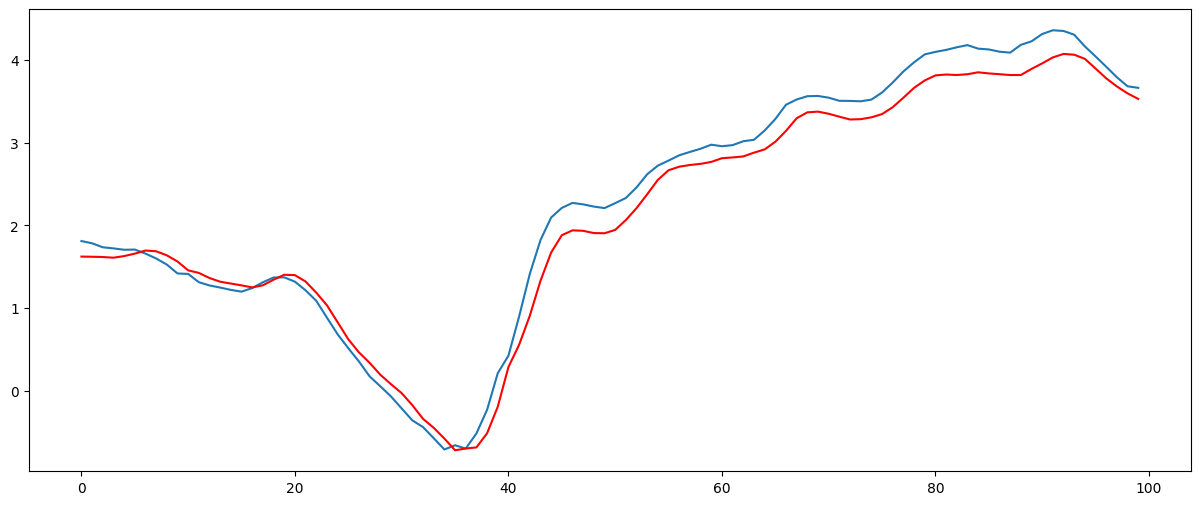

In [38]:
plt.rcParams.update({'figure.figsize': (15,6)})
plt.plot(y_test_temp[:100])
plt.plot(yp[:100] , color = "red")

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# LSTM + Sarimax

Optimization terminated successfully.
         Current function value: -1.564999
         Iterations: 3
         Function evaluations: 198


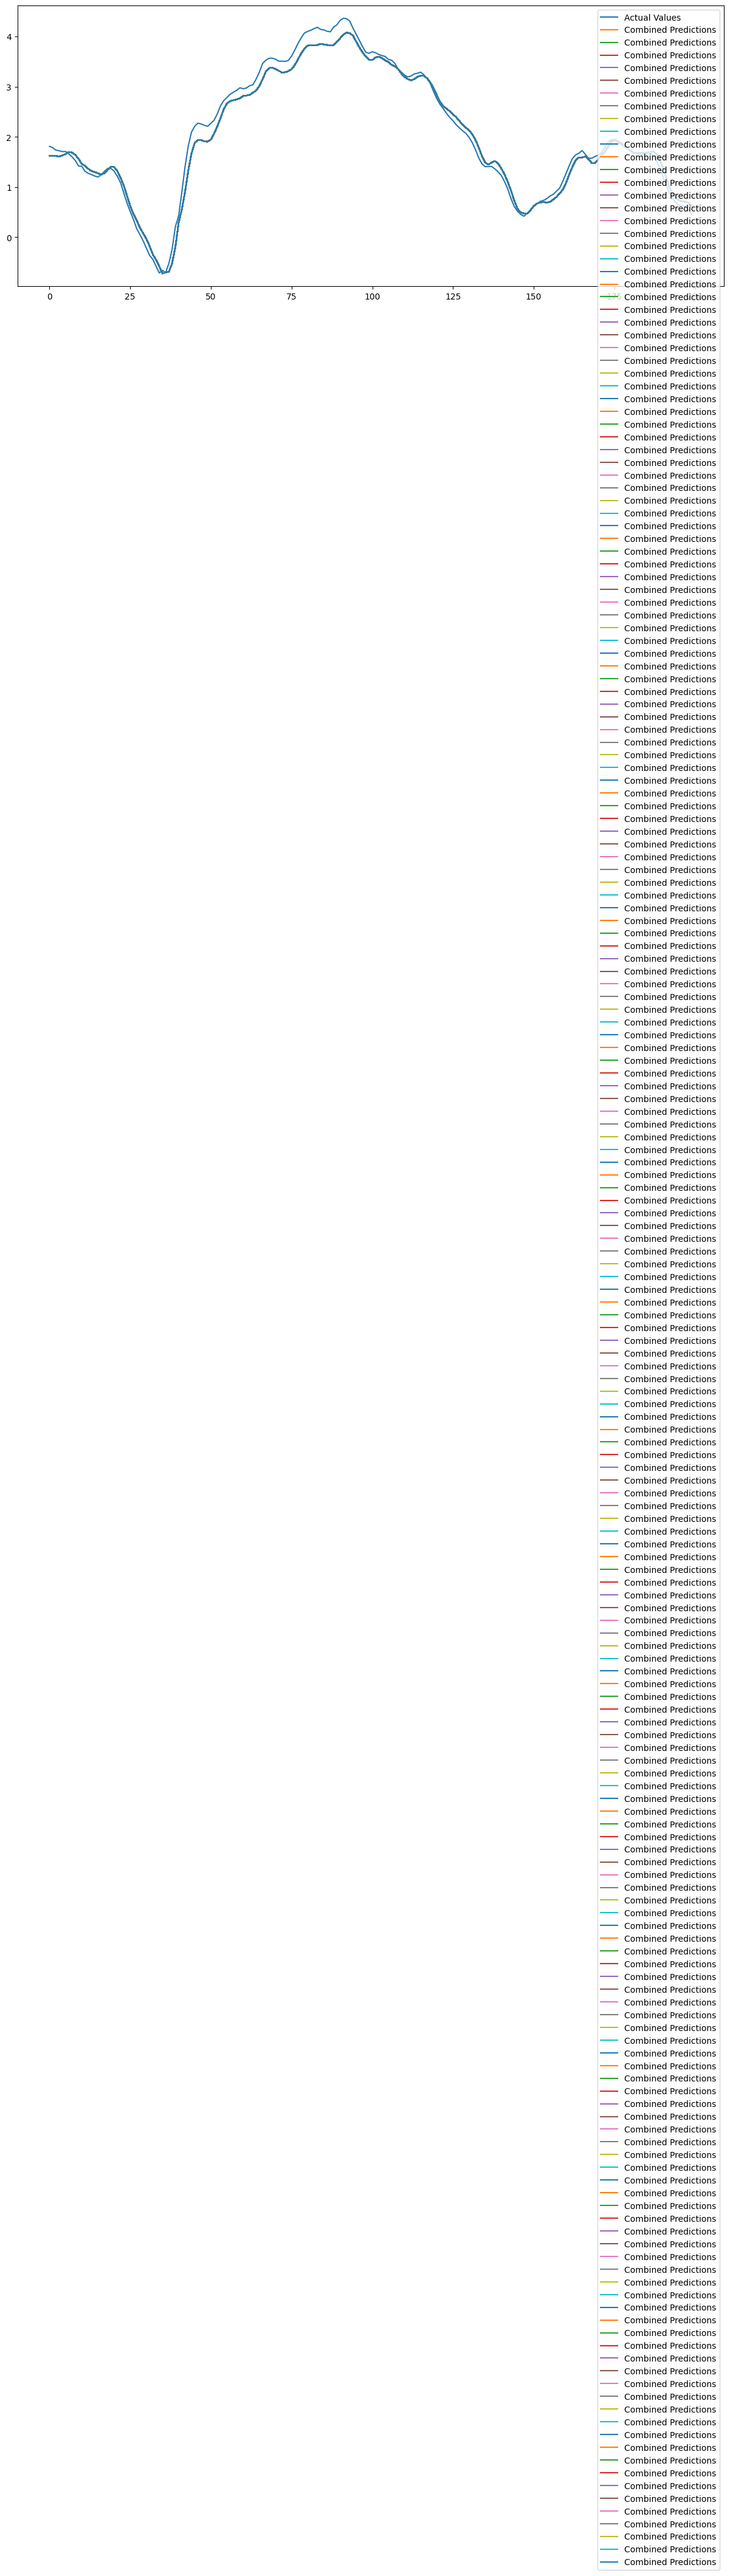

In [40]:
# Train LSTM model
# Define and compile the LSTM model
# Fit the LSTM model to the training data

# Generate LSTM predictions for future time steps
# lstm_predictions = lstm_model.predict(x_test)

# Calculate residuals (differences between actual values and LSTM predictions)
residuals = y_test_temp - yp

# Train SARIMAX model on residuals
sarimax_model = SARIMAX(residuals, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
sarimax_results = sarimax_model.fit(method='powell')

# Generate SARIMAX predictions for future time steps
sarimax_predictions = sarimax_results.predict(start=len(x_train), end=len(x_train)+len(x_test)-1)

# Combine LSTM and SARIMAX predictions
final_predictions = yp + sarimax_predictions

# Plotting the final predictions
plt.plot(y_test_temp, label='Actual Values')
plt.plot(final_predictions, label='Combined Predictions')
plt.legend()
plt.show()


# SARIMAX

In [46]:


# # Assuming you want to use temperature data from x_train
endog = x_train[:, :, 0].reshape(-1)  # Selecting the first column (temperature) as endogenous variable and reshaping to 1D

# # Define SARIMAX model
# model = SARIMAX(endog, order=(0, 1, 3), seasonal_order=(0, 1, 1, 12))

# # Fit the model
# # results = model.fit()
# # results = model.fit(maxiter=1000)  # Increase maxiter to 1000 (or higher)
# results = model.fit(method='powell')  # Try using the 'powell' method

# # Print summary
# print(results.summary())


In [47]:
# # Predicting on the test dataset
# test_predictions = results.predict(start=len(x_train), end=len(x_train)+len(x_test)-1)

# # Plotting test predictions and actual test values
# plt.figure(figsize=(10, 6))
# plt.plot(test_predictions, label='Test Predictions')
# plt.plot(y_test_temp, label='Actual Test Values')
# plt.title('SARIMAX Model Test Predictions vs Actual Test Values')
# plt.xlabel('Time')
# plt.ylabel('Temperature')
# plt.legend()
# plt.show()


In [48]:
# from sklearn.metrics import mean_squared_error
# RMSE=np.sqrt(mean_squared_error(test_predictions,y_test_temp))
# # Calculate RMSE


# print(f'Root Mean Squared Error (RMSE): {RMSE}')

# SARIMAX AND GRID SEARCH

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import warnings

# Define a function to perform grid search for SARIMAX model
def sarimax_grid_search(p_values, d_values, q_values, P_values, D_values, Q_values, m_values, train, test):
    # Create a DataFrame to store the results
    column_names = ['p', 'd', 'q', 'P', 'D', 'Q', 'm', 'RMSE_train', 'RMSE_test']
    df = pd.DataFrame(columns=column_names)
    
    # Iterate through all combinations of hyperparameters
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            for m in m_values:
                                # Fit SARIMAX model
                                try:
                                    model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, m))
                                    results = model.fit(method='powell', disp=False)
                                except Exception as e:
                                    print(f"Error fitting SARIMAX model with parameters ({p}, {d}, {q}), ({P}, {D}, {Q}, {m}): {e}")
                                    continue
                                
                                # Make predictions on train and test datasets
                                train_predictions = results.predict(start=1, end=48, typ='levels').rename('Predictions')
                                test_predictions = results.predict(start=48, end=60, typ='levels').rename('Predictions')
                                
                                # Calculate RMSE values
                                RMSE_train = np.sqrt(mean_squared_error(train_predictions, train))
                                RMSE_test = np.sqrt(mean_squared_error(test_predictions, test))
                                
                                # Append results to the DataFrame
                                df = df.append({'p': p, 'd': d, 'q': q,
                                                'P': P, 'D': D, 'Q': Q, 'm': m,
                                                'RMSE_train': RMSE_train, 'RMSE_test': RMSE_test},
                                               ignore_index=True)
    return df




In [52]:
train = x_train[:, :, 0].reshape(-1)  # Use the temperature data from x_train as the endogenous variable
test = y_test_temp  # Use the temperature data from y_test as the testing dataset
# Define hyperparameters for grid search
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
P_values = [0, 1, 2]
D_values = [0, 1]
Q_values = [0, 1, 2]
m_values = [12]

# Define seasonal hyperparameters AND TRY AFTER THE ABOVE 
# p = [1,2,3,0]
# d = [1,2,3,0]
# q = [1,2,3,0]
# P = [1,2,3,0]
# D = [1,2,3,0] # Seasonal
# Q = [1,2,3,0] # Seasonal
# m = [12]  # Monthly seasonal cycle

# Disable warnings for cleaner output
warnings.filterwarnings("ignore")

# Perform grid search
grid_results = sarimax_grid_search(p_values, d_values, q_values, P_values, D_values, Q_values, m_values, endog, test)

# Display grid search results
print(grid_results)

# Save grid search results to a CSV file
grid_results.to_csv("sarimax_grid_search_results.csv")

AttributeError: 'numpy.ndarray' object has no attribute 'rename'